In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling as pp

pd.set_option('display.max_columns', 500)

In [2]:
score_Data = pd.read_csv('./data/spreadspoke_scores.csv')

In [3]:
score_Data_after_2000 = score_Data[score_Data.schedule_season>=2000]

In [4]:
pp.ProfileReport(score_Data_after_2000)

Number of variables,18
Number of observations,5057
Total Missing (%),6.9%
Total size in memory,642.1 KiB
Average record size in memory,130.0 B
Numeric,6
Categorical,9
Boolean,2
Date,0
Text (Unique),0
Rejected,1


In [5]:
score_Data_after_2000.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
7354,09/03/2000,2000,1,False,Atlanta Falcons,36,28,San Francisco 49ers,ATL,-6.5,46.5,Georgia Dome,False,72.0,0.0,NaN,DOME
7355,09/03/2000,2000,1,False,Buffalo Bills,16,13,Tennessee Titans,BUF,-1.0,40,Ralph Wilson Stadium,False,70.0,7.0,82,NaN
7356,09/03/2000,2000,1,False,Cleveland Browns,7,27,Jacksonville Jaguars,JAX,-10.5,38.5,FirstEnergy Stadium,False,75.0,8.0,86,NaN
7357,09/03/2000,2000,1,False,Dallas Cowboys,14,41,Philadelphia Eagles,DAL,-6.0,39.5,Texas Stadium,False,95.0,7.0,32,NaN
7358,09/03/2000,2000,1,False,Green Bay Packers,16,20,New York Jets,GB,-2.5,44,Lambeau Field,False,69.0,13.0,87,NaN


In [6]:
score_Data_after_2000.columns

Index(['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'score_home', 'score_away', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium',
       'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'weather_detail'],
      dtype='object')

In [7]:
predictive_features = ['schedule_date', 'schedule_season', 'schedule_week', 
                       'schedule_playoff','team_home', 'team_away', 
                       'team_favorite_id', 'spread_favorite', 'over_under_line',
                       'stadium', 'stadium_neutral', 'weather_temperature', 
                       'weather_wind_mph', 'weather_humidity', 'weather_detail']

In [8]:
nfl_teams = pd.read_csv('data/nfl_teams.csv')
nfl_teams.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central


In [9]:
id_dict = nfl_teams.set_index('team_name')['team_id'].to_dict()

In [10]:
def over_under_result(x):
    if x['total_score'] > x['over_under_line']:
        return 'over'
    elif x['total_score'] == x['over_under_line']:
        return 'push'
    else:
        return 'under'

In [11]:
def calc_spread(x):
    if x.team_favorite_id == x.team_home_id:
        return x.score_away - x.score_home
    else:
        return x.score_home - x.score_away

In [12]:
def spread_result(x):
    if x['actual_spread'] > x['spread_favorite']:
        return 'underdog'
    elif x['actual_spread'] == x['spread_favorite']:
        return 'push'
    else:
        return 'favorite'

In [23]:

score_Data_after_2000['schedule_date'] = pd.to_datetime(score_Data_after_2000['schedule_date'], format='%m/%d/%Y')

score_Data_after_2000['over_under_line'] = score_Data_after_2000['over_under_line'].astype(
    'float')
                                                        
score_Data_after_2000.loc[:, 'team_home_id'] = score_Data_after_2000.loc[:, 'team_home'].map(
    lambda x: id_dict[x])
score_Data_after_2000.loc[:, 'team_away_id'] = score_Data_after_2000.loc[:, 'team_away'].map(
    lambda x: id_dict[x])

score_Data_after_2000['total_score'] = score_Data_after_2000['score_home'] + \
    score_Data_after_2000['score_away']

score_Data_after_2000['over_under_result'] = score_Data_after_2000.apply(
    lambda x: over_under_result(x), axis=1)

score_Data_after_2000['actual_spread'] = score_Data_after_2000.apply(
    calc_spread, axis=1)

score_Data_after_2000['spread_result'] = score_Data_after_2000.apply(
    spread_result, axis=1)

score_Data_after_2000.head()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,total_score,over_under_result,actual_spread,spread_result
7354,2000-09-03,2000,1,False,Atlanta Falcons,36,28,San Francisco 49ers,ATL,-6.5,46.5,Georgia Dome,False,72.0,0.0,NaN,DOME,ATL,SF,64,over,-8,favorite
7355,2000-09-03,2000,1,False,Buffalo Bills,16,13,Tennessee Titans,BUF,-1.0,40.0,Ralph Wilson Stadium,False,70.0,7.0,82,NaN,BUF,TEN,29,under,-3,favorite
7356,2000-09-03,2000,1,False,Cleveland Browns,7,27,Jacksonville Jaguars,JAX,-10.5,38.5,FirstEnergy Stadium,False,75.0,8.0,86,NaN,CLE,JAX,34,under,-20,favorite
7357,2000-09-03,2000,1,False,Dallas Cowboys,14,41,Philadelphia Eagles,DAL,-6.0,39.5,Texas Stadium,False,95.0,7.0,32,NaN,DAL,PHI,55,over,27,underdog
7358,2000-09-03,2000,1,False,Green Bay Packers,16,20,New York Jets,GB,-2.5,44.0,Lambeau Field,False,69.0,13.0,87,NaN,GB,NYJ,36,under,4,underdog


In [14]:
score_Data_after_2000.spread_result.value_counts(1)

underdog    0.498319
favorite    0.472414
push        0.029266
Name: spread_result, dtype: float64

In [15]:
print(score_Data_after_2000.spread_result.value_counts(1))
print('\n')
print(score_Data_after_2000.over_under_result.value_counts(1))

underdog    0.498319
favorite    0.472414
push        0.029266
Name: spread_result, dtype: float64


under    0.498121
over     0.484081
push     0.017797
Name: over_under_result, dtype: float64


In [16]:
X = score_Data_after_2000[predictive_features]

In [17]:
X.dtypes

schedule_date          datetime64[ns]
schedule_season                 int64
schedule_week                  object
schedule_playoff                 bool
team_home                      object
team_away                      object
team_favorite_id               object
spread_favorite               float64
over_under_line               float64
stadium                        object
stadium_neutral                  bool
weather_temperature           float64
weather_wind_mph              float64
weather_humidity               object
weather_detail                 object
dtype: object

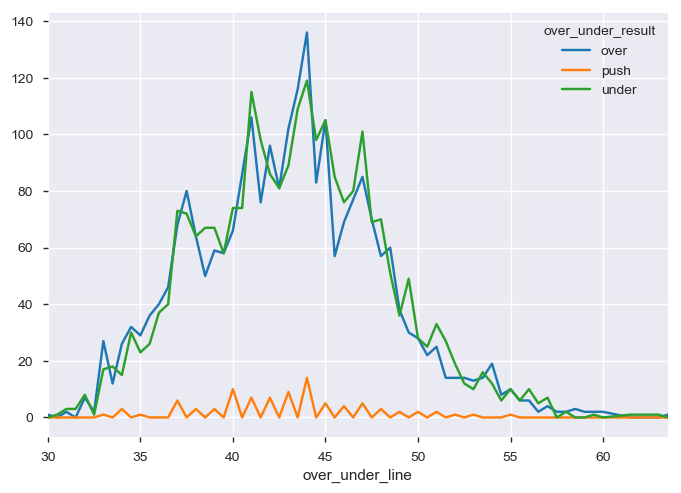

In [22]:
pd.crosstab(score_Data_after_2000.over_under_line, score_Data_after_2000.over_under_result).plot();

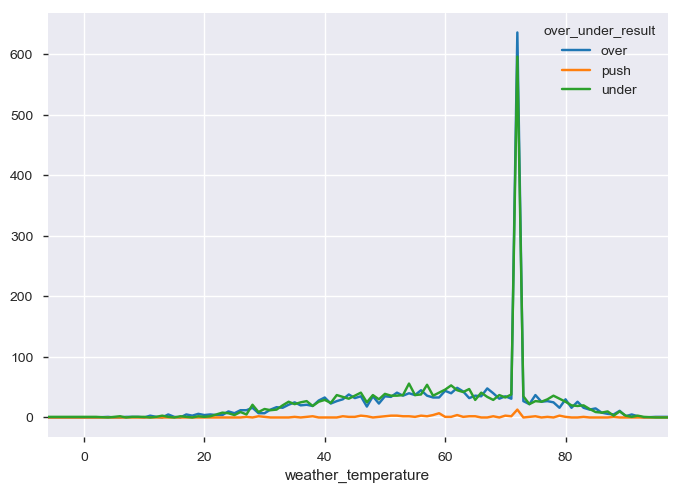

In [25]:
pd.crosstab(score_Data_after_2000.weather_temperature, score_Data_after_2000.over_under_result).plot();

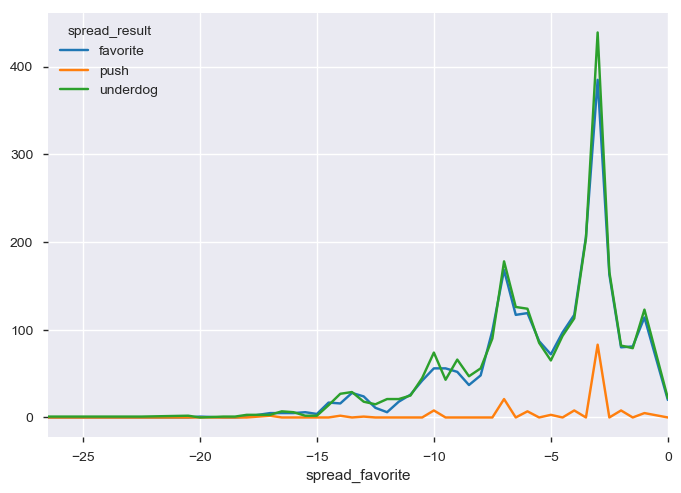

In [26]:
pd.crosstab(score_Data_after_2000.spread_favorite, score_Data_after_2000.spread_result).plot();

In [30]:
import plotly.offline as pl


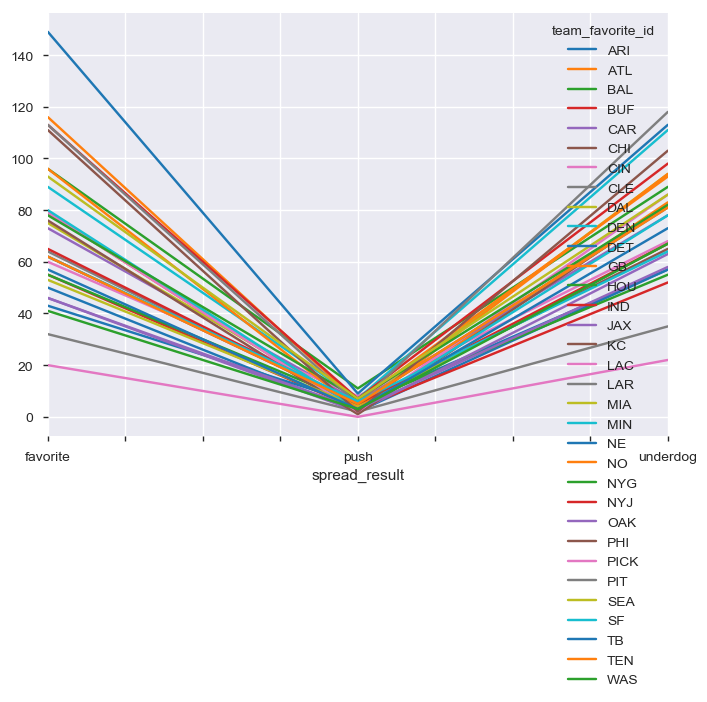

In [35]:
pd.crosstab(score_Data_after_2000.spread_result, score_Data_after_2000.team_favorite_id).plot()

In [67]:
ct = pd.crosstab(score_Data_after_2000.spread_result, score_Data_after_2000.team_favorite_id)
ct.T.div(ct.sum(), axis=0).sort_values('favorite', ascending=False)

spread_result,favorite,push,underdog
team_favorite_id,,,
NE,0.549815,0.033210,0.416974
GB,0.539535,0.027907,0.432558
IND,0.518349,0.032110,0.449541
PHI,0.513889,0.009259,0.476852
BUF,0.500000,0.027273,0.472727
SEA,0.500000,0.037634,0.462366
NO,0.497409,0.015544,0.487047
MIN,0.496894,0.018634,0.484472
BAL,0.489796,0.056122,0.454082
